# Welcome to the Dark Art of Coding:
## Introduction to Machine Learning
Intro to Scikit-Learn

<img src='../universal_images/dark_art_logo.600px.png' width='300' style="float:right">

# Objectives
---

In this session, students should expect to:

* Explore machine learning techniques, tools and categories
   * Supervised learning
   * Unsupervised learning
   * Classification
   * Regression
   * Clustering
   * Dimensionality reduction
* Review key characterisitcs of Scikit-Learn, especially the application programming interface (API)

# Machine Learning Techniques, Tools and Categories
---

Machine learning falls into two main categories: **supervised learning** and **unsupervised learning**.

## Supervised learning

Supervised learning is the process of modeling the relationship between features of a dataset and targets (labels) associated with each element of that dataset. With a model in hand, it is possible to use the model to assign labels to a new dataset that doesn't have labels. The most common examples of supervised learning include: **classification** and **regression**.

## Classification

Classification allows you to assign labels or categories to new input data.

|Inputs|Classifiction|
|:---|:---|
|Texts, emails, or comments|Spam detection|
|Flowers, insects, or animals|Species detection|
|Viewers, readers, buyers|Customer detection|

## Regression

Regression analysis allows you to predict continuous quantities based on new input data. 

|Inputs|Outputs|
|:---|:---|
|Auto characteristics (color, model, age, etc)|Price|
|Advertising dollars spent|Sales revenue|
|Candidate characteristics|Salary|

## Unsupervised learning

## Clustering

## Dimensionality reduction

# Key Characteristics of Scikit-Learn
---

Scikit-Learn is a well known package that provides access to many common machine learning algorithms through a consistent, well-organized Application Programming Interface (API) and is supported by very thorough and comprehensive documentation.

The uniform syntax and the consistency in how the API is designed means that once you learn one model, it is surprisingly easy to pick up additional models.

A key goal is to help you walk away feeling very familiar with:

* the API
* the vocabulary of machine learning
* how to learn more

If we succeed in that, you will be well-poised to continue your journey and to pursue future studies in the awesomeness that is machine learning.

# The Scikit-Learn API
---

The Scikit-Learn interface follows a number of guidelines covered in the API Contract (as defined in the API design paper: https://arxiv.org/abs/1309.0238)

"As much as possible, our design choices have been guided so as to avoid the
proliferation of framework code. We try to adopt simple conventions and to
limit to a minimum the number of methods an object must implement. The API
is designed to adhere to the following broad principles:

**Consistency**. All objects (basic or composite) share a consistent interface composed of a limited set of methods. This interface is documented in a consistent manner for all objects.

**Inspection**. Constructor parameters and parameter values determined by learning algorithms are stored and exposed as public attributes.

**Non-proliferation of classes**. Learning algorithms are the only objects to be
represented using custom classes. Datasets are represented as NumPy arrays
or SciPy sparse matrices. Hyper-parameter names and values are represented
as standard Python strings or numbers whenever possible. This keeps scikitlearn easy to use and easy to combine with other libraries.

**Composition**. Many machine learning tasks are expressible as sequences or
combinations of transformations to data. Some learning algorithms are also
naturally viewed as meta-algorithms parametrized on other algorithms. Whenever feasible, such algorithms are implemented and composed from existing
building blocks.

**Sensible defaults**. Whenever an operation requires a user-defined parameter,
an appropriate default value is defined by the library. The default value
should cause the operation to be performed in a sensible way (giving a baseline solution for the task at hand)."

For some details on how the API is put together: [Contributors API Overview](https://scikit-learn.org/stable/developers/contributing.html#api-overview)

## Using the Scikit-Learn API

By and large, using any given model in Scikit-Learn will follow a set of straightforward steps. Each of our examples will follow this process.

1. **Prep the data**: the data must be well prepared for it to be usable in the various models. This preparation may include normalization, cleansing, wrangling of the data. It often needs to be separated into a features matrix and a target vector and/or may need to be broken into separate collections of data for training versus testing purposes.

1. **Choose the model**: to choose a model, we will import the appropriate estimator class

1. **Choose appropriate hyperparameters**: to prepare the model, we create a class instance and provide hyperparameters as arguments to the class

1. **Fit the model**: call the `.fit()` method on the model instance and provide training data

1. **Apply the model**: lastly, we apply the model to new data, using primarily one of two methods:

   * **Supervised learning**: generally, we use the `.predict()` method to predict new labels
   * **Unsupervised learning**: generally, we use either the `.predict()` or `.transform()` methods to predict properties OR transform properties of the data.
   
1. **Examine the results**: it is recommended that we look over the results and do a sanity check. Some of this can done by looking at output values. Other times it really helps to have some form of data visualization (graph/chart) to help us examine the model predictions or transformations.



## A quick demo

For this example, we will take a quick look at coffee prices near the North Shore of Oahu, Hawaii. Our goal will be to predict the price of a cup of coffee, given a cup size.

These prices come from several coffee shops in the area, in 2019.

|Size (oz)|Price ($)|
|----|----|
|12|2.95|
|16|3.65|
|20|4.15|
|14|3.25|
|18|4.20|


### Prep the data

We will start by looking generally at the data using some charting tools and putting it into a format that our machine learning tools can use.

Let's look at the data in a simple scatter plot to compare the cost of coffee versus the size of the cup.

In [30]:
import matplotlib.pyplot as plt

In [31]:
import numpy as np

In [32]:
x = np.array([12, 16, 20, 14, 18])             # Coffee sizes
y = np.array([2.95, 3.65, 4.15, 3.25, 4.20])   # Coffee prices

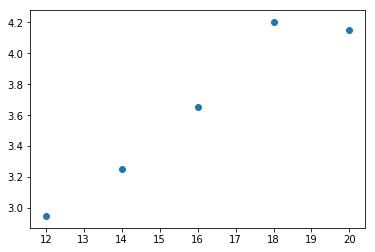

In [33]:
plt.scatter(x, y);

In order to put this data into a linear regression machine learning algorithm, our features (coffee sizes/`x` values) need to be in a matrix format, with one "row" per data point (despite the row only having a single value). Currently, our `x` values are simply an array, not a matrix, so we use a tool in `numpy` to increase the number of dimensions in the data.  The following snippet slices from the first value of x to the last value and adds a new axis/new dimension.

```
x[:, np.newaxis]
```

It is fairly common to name the features of the model: `X` (as a capital letter) or to label the data as a training set.

In [42]:
print('Shape of x (note: lowercase):', x.shape)
x

Shape of x (note: lowercase): (5,)


array([12, 16, 20, 14, 18])

In [41]:
X = x[:, np.newaxis]                               # creates an array of arrays
print('Shape of X (note: uppercase):', X.shape)    # five rows, one value per row
X

Shape of X (note: uppercase): (5, 1)


array([[12],
       [16],
       [20],
       [14],
       [18]])

Our target values are generally labeled `y` (lower case) and these values can be a simple array.

In [11]:
y

array([2.95, 3.65, 4.15, 3.25, 4.2 ])

### Choose the Model

For this example, we are gonna import a simple **linear regression** model from the sklearn collection of linear models.

In [49]:
from sklearn.linear_model import LinearRegression

### Choose Appropriate Hyperparameters

This model comes, as do most of the models in sklearn with arguments (or hyperparameters) set to sane defaults, so for this case, we won't add or change any arguments.

**NOTE**: When Jupyter evaluates a model, it displays a string representation of that model with the current settings for the model, including any defaults.

In [50]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Fit the model

With a prepared model, we need to feed it data to evaluate. For this linear regression model, we give it two arguments: `X` and `y`.

In [51]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

With these inputs, the model was able to calculate the **slope** (coefficient) and the **y-intercept** of the line that aligns most closely with our training data.

Let's look at both of these calculated results.

```python
model.coef_
model.intercept_
```

**NOTE**: scikit-learn appends an `_` to the end of attributes that return calculated values. It does this to help distinguish between inputs and outputs

In [52]:
model.coef_

array([0.1675])

In [53]:
model.intercept_

0.9599999999999995

### Apply the model

With a trained model, we can now feed the model some test data to see what values it predicts.

Let's prep several cup sizes to see what price the model will predict.

It is common to see these data sets labeled as `fit` data, hence the labels below (`xfit`, `Xfit`, `yfit`).

We start by pulling together a set of x values (representing size in oz.) and storing them in a matrix for inclusion as an argument in the `model.predict()` method.

In [81]:
xfit = np.array([16, 15, 12, 20, 17])

In [82]:
Xfit = xfit[:, np.newaxis]

In [83]:
yfit = model.predict(Xfit)
yfit

array([3.64  , 3.4725, 2.97  , 4.31  , 3.8075])

### Examine the Results

From here, we can plot all of the data points together on one chart:

* original values in purple
* predicted values in red
* predicted slope of the line that best fits the original training data

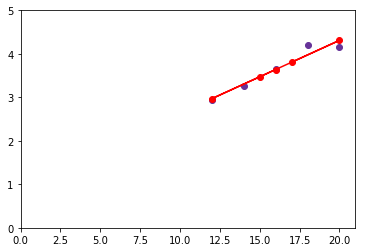

In [94]:
plt.scatter(x, y, color='rebeccapurple')
plt.scatter(xfit, yfit, color='red')
plt.plot(xfit, yfit, color='red')
plt.xlim(0, 21)
plt.ylim(0, 5);

In [93]:
# For reference, against the above graph:

print('Coefficient/slope:', model.coef_)
print('y-intercept:', model.intercept_)


Coefficient/slope: [0.1675]
y-intercept: 0.9599999999999995


### Deep Dive

As you explore machine learning, you will encounter a wide array of names for the various types of data:

**Features**:

* This data is what we know and is potentially related to the target
* Also referred to as: 
    * independent variables, observed variables, explanatory variables and input variables
    * `x`, `X`
    
**Targets**:

* Also referred to as: dependent variable, unobserved variable, explained variable, output variable, outcome measurement
* Many variants are popular with statisticians, etc
    * y, Y
    
Data may also be referred to as training data or test data.    


### Gotchas

When prepping your data, it is important to formulate the data into the format that the tool expects.

Features are expected to be a matrix and bad things happen if you simply provide an array.

How do you know what you have and whether it is a matrix?

* `type(obj)` to determine whether you have a compatible data type
* `obj.shape` to determine what shape the data is in (i.e. a 1D array versus a 2D matrix)



### How to learn more: tips and tricks

As we explore the Scikit-Learn API, and as we progress through the upcoming examples I want to preposition you for success by showing you where and how you can learn more.

One great resource to better understand the many options available to you in terms of the machine learning algorithms and the hyper parameters in scikit learn is the API Reference.

[API Reference](https://scikit-learn.org/stable/modules/classes.html): A one-stop shop for the classes and functions in `sklearn`

# Experience Points!
---

# delete_this_line: task 01

In **`jupyter`** create a simple script to complete the following tasks:


**REPLACE THE FOLLOWING**

Create a function called `me()` that prints out 3 things:

* Your name
* Your favorite food
* Your favorite color

Lastly, call the function, so that it executes when the script is run

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# Experience Points!
---

# delete_this_line: task 02

In **`jupyter`** create a simple script to complete the following tasks:

**REPLACE THE FOLLOWING**

Task | Sample Object(s)
:---|:---
Compare two items using `and` | 'Bruce', 0
Compare two items using `or` | '', 42
Use the `not` operator to make an object False | 'Selina' 
Compare two numbers using comparison operators | `>, <, >=, !=, ==`
Create a more complex/nested comparison using parenthesis and Boolean operators| `('kara' _ 'clark') _ (0 _ 0.0)`

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# Experience Points!
---

# delete_this_line: sample 03

In your **text editor** create a simple script called:

```bash
my_lessonname_03.py```

Execute your script on the command line using **`ipython`** via this command:

```bash
ipython -i my_lessonname_03.py```

**REPLACE THE FOLLOWING**

I suggest that as you add each feature to your script that you run it right away to test it incrementally. 

1. Create a variable with your first name as a string AND save it with the label: `myfname`.
1. Create a variable with your age as an integer AND save it with the label: `myage`.

1. Use `input()` to prompt for your first name AND save it with the label: `fname`.
1. Create an `if` statement to test whether `fname` is equivalent to `myfname`. 
1. In the `if` code block: 
   1. Use `input()` prompt for your age AND save it with the label: `age` 
   1. NOTE: don't forget to convert the value to an integer.
   1. Create a nested `if` statement to test whether `myage` and `age` are equivalent.
1. If both tests pass, have the script print: `Your identity has been verified`

When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# References
---

Below are references that may assist you in learning more:
    
|Title (link)|Comments|
|---|---|
|[API Reference](https://scikit-learn.org/stable/modules/classes.html)|One stop shop for the classes and functions in `sklearn`|

API design:  https://arxiv.org/abs/1309.0238



https://en.wikipedia.org/wiki/Regression_analysis